In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
# Load dataset from Google Sheets
url = "https://docs.google.com/spreadsheets/d/1VP9BE_eI2yl6uUHSm4mGiiwjRdoqCqnkcIjsv5Q2ex4/export?format=csv"
df = pd.read_csv(url)
df


,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0


In [7]:
# Display the columns to check the column names
print("Columns in the dataset:", df.columns)


Columns in the dataset: Index(['Name', 'Team', 'Number', 'Position', 'Age', 'Height', 'Weight',
       'College', 'Salary'],
      dtype='object')


## Step 2: Preprocessing

In [8]:
#  Correct the "Height" column by replacing it with random values between 150 and 180.
np.random.seed(42)  # For reproducibility
df['Height'] = np.random.randint(150, 181, size=len(df))
df['Height']



0      156
1      169
2      178
3      164
4      160
      ... 
453    168
454    153
455    152
456    166
457    166
Name: Height, Length: 458, dtype: int32

In [9]:
# Check if the "Height" column is updated correctly
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,156,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,169,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,178,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,164,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,160,231,NaN,5000000.0


## Step 3: Analysis Tasks


In [10]:
#1. Determine the distribution of employees across each team and calculate the percentage split relative to the total number of employees.
if 'Team' in df.columns:
    team_distribution = df['Team'].value_counts()
    team_percentage = (team_distribution / len(df)) * 100
    print("Team distribution and percentage:", team_distribution, team_percentage)


Team distribution and percentage: Team
New Orleans Pelicans      19
Memphis Grizzlies         18
Utah Jazz                 16
New York Knicks           16
Milwaukee Bucks           16
Brooklyn Nets             15
Portland Trail Blazers    15
Oklahoma City Thunder     15
Denver Nuggets            15
Washington Wizards        15
Miami Heat                15
Charlotte Hornets         15
Atlanta Hawks             15
San Antonio Spurs         15
Houston Rockets           15
Boston Celtics            15
Indiana Pacers            15
Detroit Pistons           15
Cleveland Cavaliers       15
Chicago Bulls             15
Sacramento Kings          15
Phoenix Suns              15
Los Angeles Lakers        15
Los Angeles Clippers      15
Golden State Warriors     15
Toronto Raptors           15
Philadelphia 76ers        15
Dallas Mavericks          15
Orlando Magic             14
Minnesota Timberwolves    14
Name: count, dtype: int64 Team
New Orleans Pelicans      4.148472
Memphis Grizzlies        

In [20]:
    # # Visualization for team distribution
    # plt.figure(figsize=(30, 16))
    # sns.barplot(x=team_distribution.index, y=team_distribution.values, palette='viridis')
    # plt.title('Employee Distribution Across Teams')
    # plt.xlabel('Team')
    # plt.ylabel('Number of Employees')
    # plt.xticks(rotation=45)
    # plt.show()


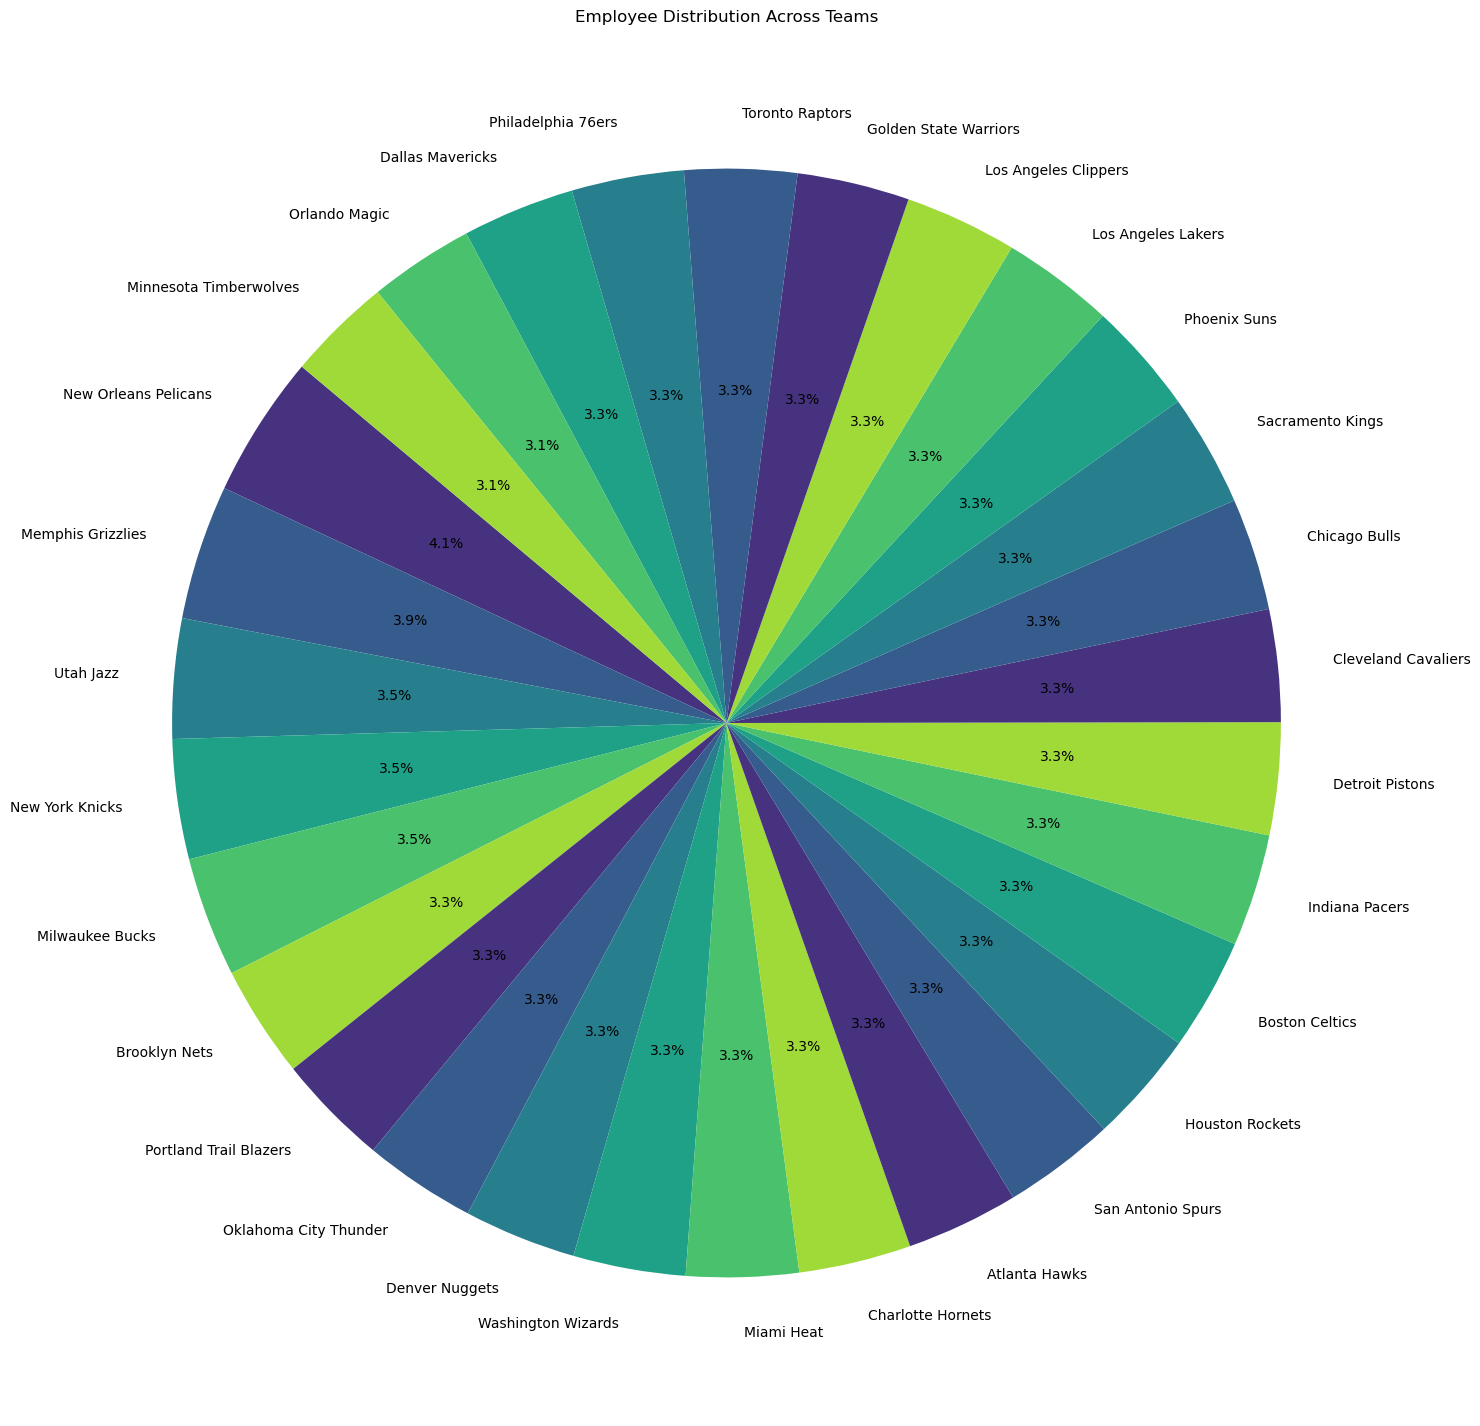

In [11]:
import matplotlib.pyplot as plt

# Visualization for team distribution as a pie chart
plt.figure(figsize=(20, 18))
plt.pie(team_distribution.values, labels=team_distribution.index, autopct='%1.1f%%', colors=sns.color_palette('viridis'), startangle=140)
plt.title('Employee Distribution Across Teams')
plt.show()

In [12]:
#2. Segregate employees based on their positions within the company.
if 'Position' in df.columns:
    position_distribution = df['Position'].value_counts()
    print("Position distribution:", position_distribution)


Position distribution: Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64


In [25]:
#  # Visualization for position distribution
# plt.figure(figsize=(10, 6))
# sns.barplot(x=position_distribution.index, y=position_distribution.values, palette='plasma')
# plt.title('Employee Distribution by Position')
# plt.xlabel('Position')
# plt.ylabel('Number of Employees')
# plt.xticks(rotation=45)
# plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_3020\2885753030.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=position_distribution.index, y=position_distribution.values, palette='plasma')


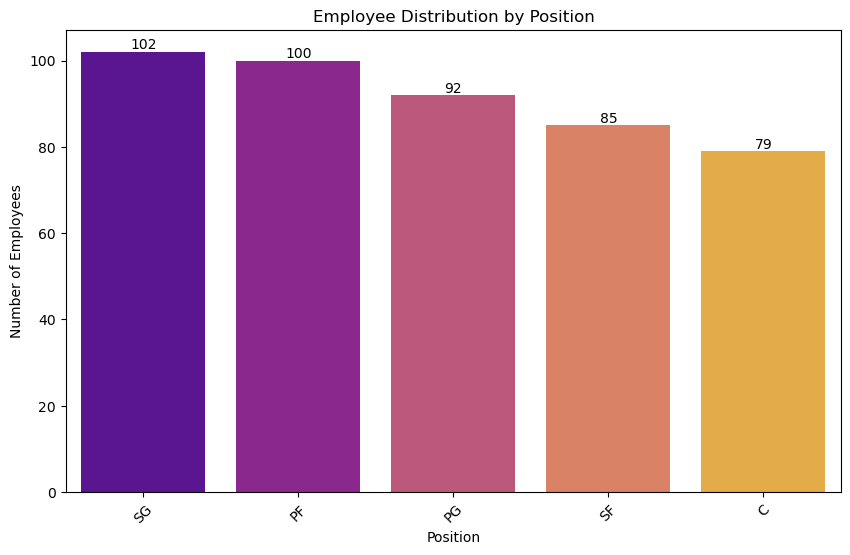

In [13]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=position_distribution.index, y=position_distribution.values, palette='plasma')
plt.title('Employee Distribution by Position')
plt.xlabel('Position')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)

# Add data labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Text to display (height of the bar)
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position of the label
                ha='center', va='center',  # Alignment
                xytext=(0, 5),  # Offset from the bar
                textcoords='offset points')  # Coordinate system for the offset

plt.show()

In [14]:
#3. Identify the predominant age group among employees.
if 'Age' in df.columns:
    predominant_age_group = df['Age'].mode()[0]
    print("Predominant age group:", predominant_age_group)


Predominant age group: 24


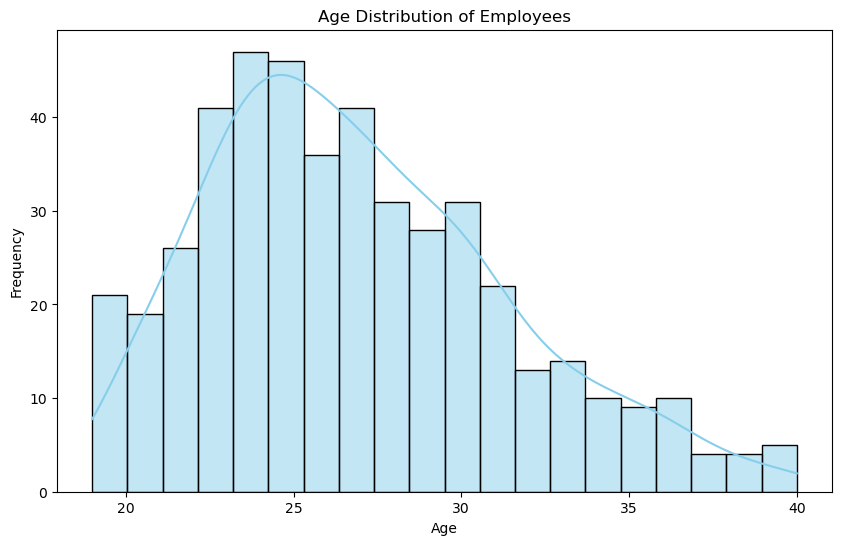

In [15]:
 # Visualization of age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Employees')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [16]:

# Task 4: Discover which team and position have the highest salary expenditure
# Fix the column name to match the dataset's exact capitalization
if 'Salary' in df.columns:
    salary_by_team = df.groupby('Team')['Salary'].sum()
    salary_by_position = df.groupby('Position')['Salary'].sum()



In [17]:
    # Display the team and position with the highest salary expenditure
    highest_salary_team = salary_by_team.idxmax()
    highest_salary_position = salary_by_position.idxmax()
    print("Highest salary expenditure team:", highest_salary_team)
    print("Highest salary expenditure position:", highest_salary_position)


Highest salary expenditure team: Cleveland Cavaliers
Highest salary expenditure position: C


C:\Users\HP\AppData\Local\Temp\ipykernel_3020\3097310273.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=salary_by_team.index, y=salary_by_team.values, palette='coolwarm')


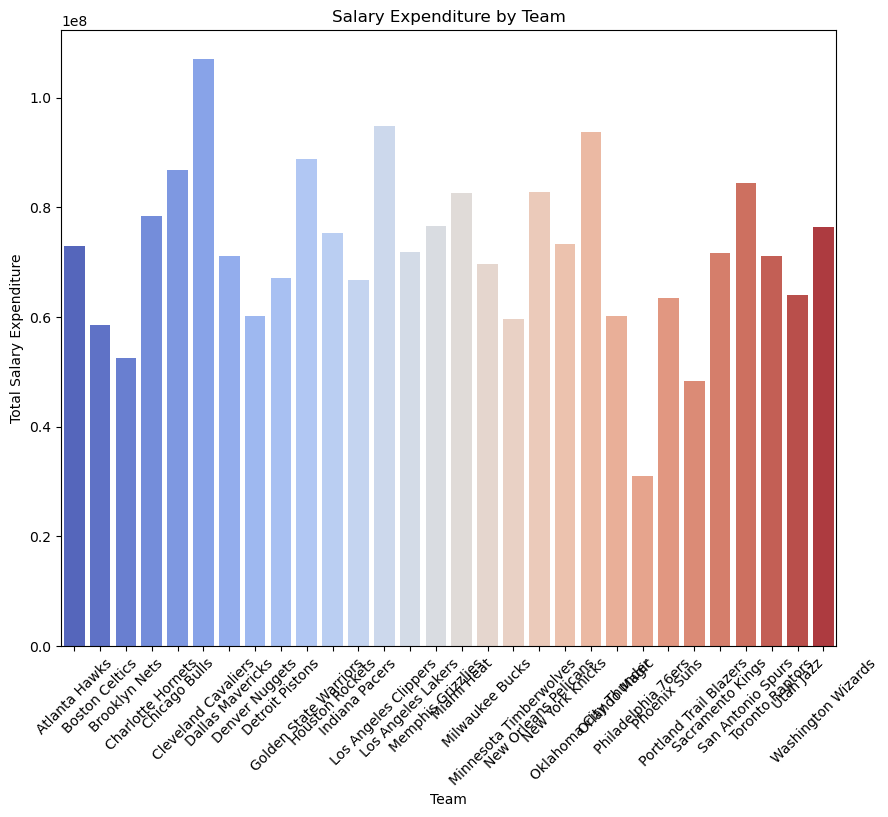

In [22]:
   # Visualization of salary expenditure by team
plt.figure(figsize=(10, 8))
sns.barplot(x=salary_by_team.index, y=salary_by_team.values, palette='coolwarm')
plt.title('Salary Expenditure by Team')
plt.xlabel('Team')
plt.ylabel('Total Salary Expenditure')
plt.xticks(rotation=45)
plt.show()



Correlation between Age and Salary:              Age    Salary
Age     1.000000  0.214009
Salary  0.214009  1.000000


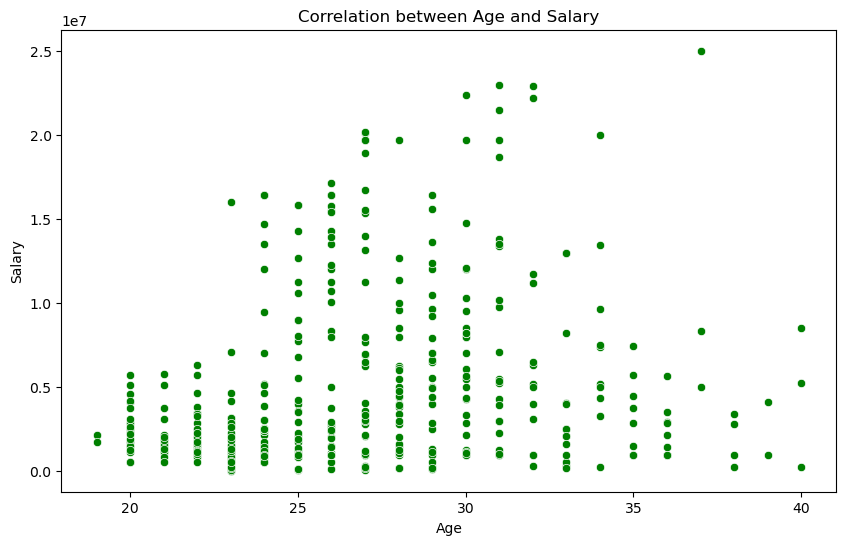

In [23]:
# Task 5: Investigate if there's any correlation between age and salary, and represent it visually
# Fix the column name to match the dataset's exact capitalization
if 'Age' in df.columns and 'Salary' in df.columns:
    correlation = df[['Age', 'Salary']].corr()
    print("Correlation between Age and Salary:", correlation)
    
    # Scatter plot to visualize the correlation between age and salary
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Age', y='Salary', data=df, color='green')
    plt.title('Correlation between Age and Salary')
    plt.xlabel('Age')
    plt.ylabel('Salary')
    plt.show()


Predominant age group: 24


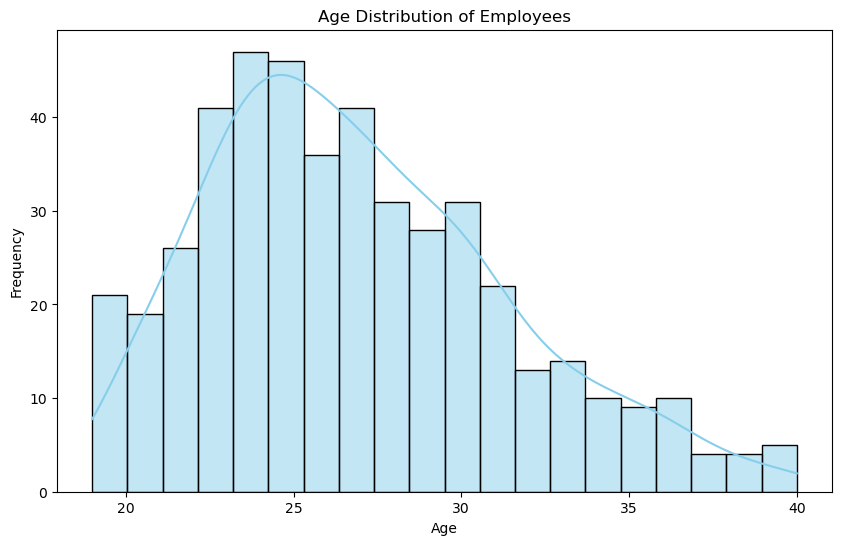

In [32]:

# Task 3: Identify the predominant age group
# Fix the column name to match the dataset's exact capitalization
if 'Age' in df.columns:
    predominant_age_group = df['Age'].mode()[0]
    print("Predominant age group:", predominant_age_group)
    
    # Visualization of age distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
    plt.title('Age Distribution of Employees')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.show()


Highest salary expenditure team: Cleveland Cavaliers
Highest salary expenditure position: C


C:\Users\HP\AppData\Local\Temp\ipykernel_3020\1857054431.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=salary_by_team.index, y=salary_by_team.values, palette='coolwarm')


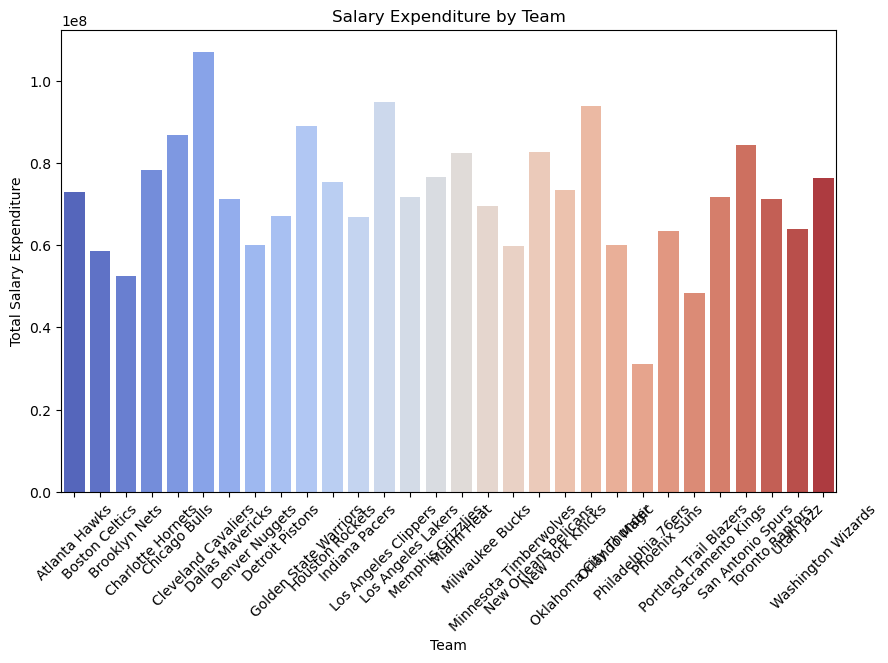

In [33]:
# Task 4: Discover which team and position have the highest salary expenditure
# Fix the column name to match the dataset's exact capitalization
if 'Salary' in df.columns:
    salary_by_team = df.groupby('Team')['Salary'].sum()
    salary_by_position = df.groupby('Position')['Salary'].sum()
    
    # Display the team and position with the highest salary expenditure
    highest_salary_team = salary_by_team.idxmax()
    highest_salary_position = salary_by_position.idxmax()
    print("Highest salary expenditure team:", highest_salary_team)
    print("Highest salary expenditure position:", highest_salary_position)
    
    # Visualization of salary expenditure by team
    plt.figure(figsize=(10, 6))
    sns.barplot(x=salary_by_team.index, y=salary_by_team.values, palette='coolwarm')
    plt.title('Salary Expenditure by Team')
    plt.xlabel('Team')
    plt.ylabel('Total Salary Expenditure')
    plt.xticks(rotation=45)
    plt.show()


Correlation between Age and Salary:              Age    Salary
Age     1.000000  0.214009
Salary  0.214009  1.000000


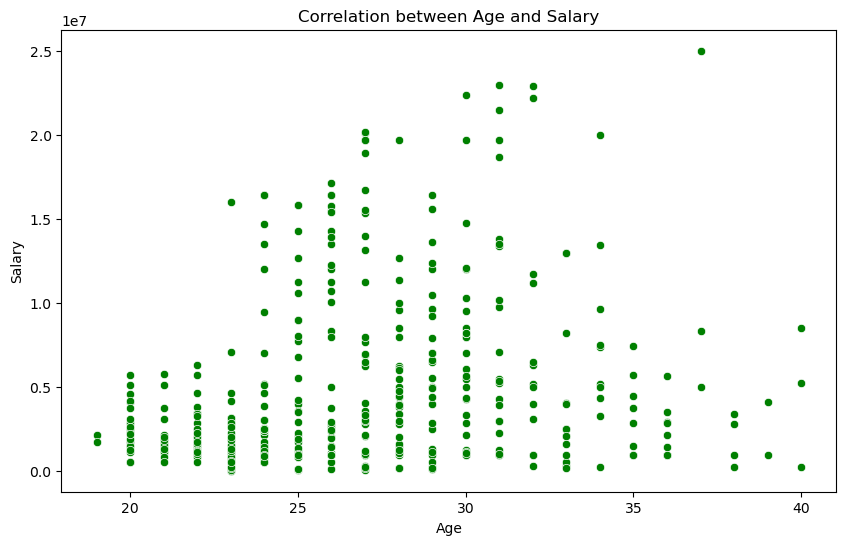

In [34]:
# Task 5: Investigate if there's any correlation between age and salary, and represent it visually
# Fix the column name to match the dataset's exact capitalization
if 'Age' in df.columns and 'Salary' in df.columns:
    correlation = df[['Age', 'Salary']].corr()
    print("Correlation between Age and Salary:", correlation)
    
    # Scatter plot to visualize the correlation between age and salary
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Age', y='Salary', data=df, color='green')
    plt.title('Correlation between Age and Salary')
    plt.xlabel('Age')
    plt.ylabel('Salary')
    plt.show()
